# Non Hierarchical Clustering using __MiniBatchMeans__

Compared to K-Means,
- computation time is significantly reduced,
- but accuracy may be slightly lower.

The use of MiniBatchMeans is recommended when the number of data __exceeds 10,000__.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn import preprocessing
from sklearn import mixture


# Prepare Dataset
df_wine_classification = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",
    header=None
)

df_wine = df_wine_classification[
    [0, 10, 13]
]
df_wine.columns = [
    '1) Alcohol',
    '10)Color intensity',
    '13)Proline'
]

# Standardize and visualize.
X = df_wine[
    ['10)Color intensity', '13)Proline']
]

sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X)
x = X_norm[:, 0]
y = X_norm[:, 1]
z = df_wine['1) Alcohol']

In [2]:
def plot_scatter_graph(method, title: str) -> None:
    fitted = method.fit(X_norm)

    plt.figure(figsize=(8, 3))
    plt.scatter(
        x,
        y,
        c=fitted.labels_
    )
    plt.scatter(
        fitted.cluster_centers_[:, 0],
        fitted.cluster_centers_[:, 1],
        s=250,
        marker='*',
        c='red'
    )
    plt.suptitle(title)
    plt.show()

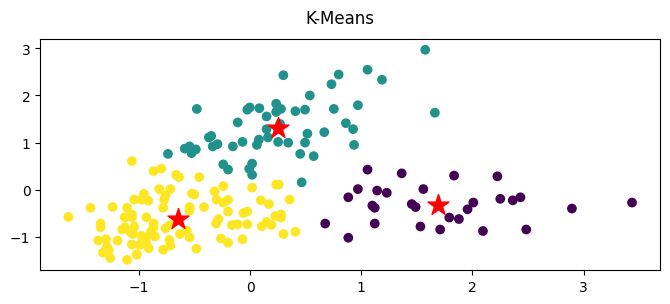

In [3]:
# KMeans Clustering (for comparison with GMM Clustering)
km = cluster.KMeans(
    n_clusters=3,
    n_init=10
)

plot_scatter_graph(km, 'K-Means')

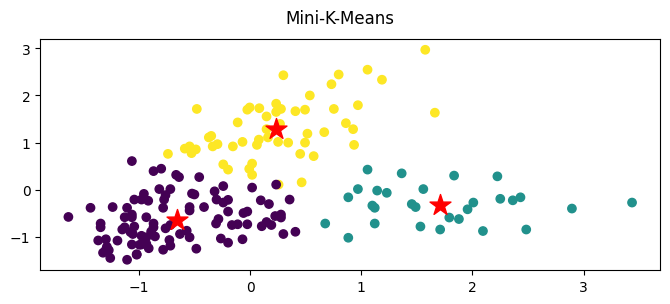

In [4]:
# MiniBatchMeans Clustering
mini_km = cluster.MiniBatchKMeans(
    n_init=10,
    n_clusters=3,
    # Update not all data but every batch_size portion of data.
    batch_size=100
)

plot_scatter_graph(mini_km, 'Mini-K-Means')